# Zadaća 3
##### Rok za predaju: 17. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import hinge_loss

## Zadatak 1 (10):
Učitajte podatke iz prošle zadaće (*X\_a i y\_a te X\_b i y\_b*) te nove
podatke *X\_c i y\_c*.
Postavite *SVM* modele koje ćete učiti na učitanim podacima.
Koristite ugrađene klase iz modula *sklearn.svm*. Pratite sljedeće
upute:

1.  Primijenite model SVC s linearnom jezgrenom funkcijom na učitane
    podatke

2.  Ispišite koeficijente $\theta_0$ i $\theta$.

3.  Ispišite potporne vektore.

4.  Izračunajte širinu dobivene margine.

5.  Grafički prikažite podatke, dobivenu hiperravninu koja razdvaja
    podatke i potporne vektore.

6.  Usporedite rezultate iz prošle zadaće s ovom. Odgovorite - u kakvom
    su odnosu dobivene vrijednosti margina u prošloj zadaći i ovoj?

( Učinite to za podatke X\_a, podatke X\_b i X\_c. )

Odaberite jedan od dva skupa podataka (X\_a ili podatke X\_b). Što će se
dogoditi ako iz njega maknete određeni dio podataka? Koristeći
*numpy.random.choice* (ili bilo koju drugu metodu), nasumično odaberite
1000 podataka te na njima ponovite gornji postupak. Usporedite rezultate
s gore dobivenim (parametre, margine, potporne vektore). Što možete
zaključiti o ulozi potpornih vektora?

- Implementirajte funkciju hinge(x, y) koja računa broj krivo određenih
predikcija modela za skup podataka $x$. 
- Testirajte funkciju na vlastitom primjeru (od npr. $4-5$ podataka). 
- Sada proučite ugrađenu hinge\_loss
funkciju
[[Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)]
te ju pokrenite na primjeru kojeg ste odabrali, rezultati vam se moraju
poklapati. 
- Također, pokrenite vašu funkciju na nekom od SVC modela koje
ste implementirali prethodno u zadatku i ispišite dobiveni rezultat.

In [5]:
def LoadData(pathX,pathY):
    X = pd.read_csv(pathX)
    Y = pd.read_csv(pathY)
    
    X = X.to_numpy()
    # X = np.c_[np.ones(X.shape[0]),X]
    Y = Y.to_numpy()
    return X,Y

In [56]:
def Linear(X,y):
    clf= SVC(kernel = 'linear')
    clf.fit(X, y.ravel())

    theta = clf.coef_[0]
    theta_0 =  clf.intercept_[0]
    print("theta = ", clf.coef_, clf.intercept_)
    
    print("Potporni vektori su:\n ", clf.support_vectors_)
    print("Gamma = ",np.min(np.abs((X.dot(theta)+theta_0)/np.linalg.norm(theta))) )
    
    xx = np.linspace(-10,30)
    yy =  -theta[0]/theta[1]* xx - theta_0 / theta[1]
    plt.plot(xx, yy, 'k-')
    plt.scatter(X[:,0], X[:,1], c=['red' if i==1 else 'blue' for i in y])
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],marker='*')
    plt.show()

    return [theta_0,theta]

theta =  [[-0.50341657  0.50338949]] [-1.00649354]
Potporni vektori su:
  [[ 6.41636799  6.42930926]
 [19.29938341 19.31301455]
 [ 5.00644063  8.99314232]
 [ 5.72973428  9.71630369]
 [13.43259782 17.41947595]
 [12.65785892 16.64416419]]
Gamma =  1.4044116626247969


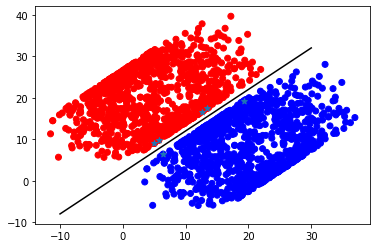

theta =  [[-0.16160019  0.1615812 ]] [-0.40368282]
Potporni vektori su:
  [[13.07287283  9.3862776 ]
 [ 7.66758227  3.97609536]
 [15.76276173 12.07636037]
 [ 7.55536057 16.24252895]
 [11.41787863 20.10450994]]
Gamma =  4.374230216652983


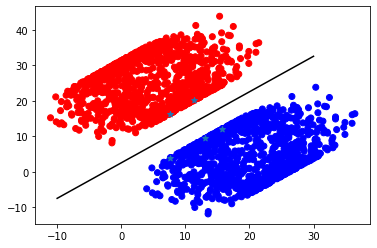

theta =  [[-0.28496183  0.32870287]] [-0.21172008]
Potporni vektori su:
  [[ 3.11384486  1.18855273]
 [ 3.10088663  0.45410078]
 [ 6.94217467  3.72313211]
 [ 3.56904562  0.69524978]
 [ 7.63503956  4.28197211]
 [ 1.40702286  7.7114211 ]
 [ 1.98775873  7.52002018]
 [ 0.36031614  7.19260243]
 [ 9.26326061 11.18855273]
 [ 7.80731493 10.45410078]
 [ 2.78282209  5.58306498]
 [ 4.87258042  7.27146905]
 [ 2.35800137  5.73196542]
 [ 4.3700238   6.70151827]
 [ 0.01581934 -2.2885789 ]
 [-0.94771838 -2.47997982]
 [ 0.02488871 -2.80739757]]
Gamma =  1.6283258383391426


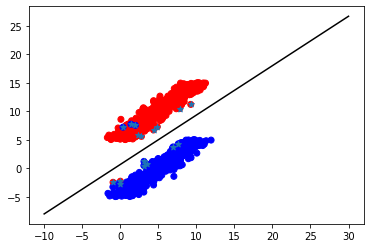

[-0.21172008313327714, array([-0.28496183,  0.32870287])]

In [57]:
X_a, y_a = LoadData('./X_a.csv', './y_a.csv')
X_b, y_b = LoadData('./X_b.csv', './y_b.csv')
X_c, y_c = LoadData('./X_c.csv', './y_c.csv')

Linear(X_a,y_a)
Linear(X_b,y_b)
Linear(X_c,y_c)

theta =  [[-0.50336843  0.50344128]] [-1.00796353]
Potporni vektori su:
  [[12.79416478 12.80786571]
 [19.29938341 19.31301455]
 [13.43259782 17.41947595]
 [11.00306836 14.98953444]
 [12.135329   16.1217722 ]]
Gamma =  1.40393006020232


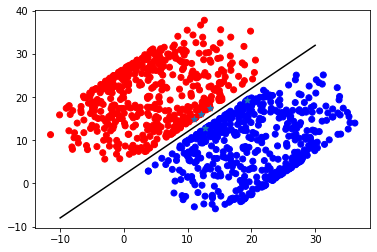

[-1.0079635265330646, array([-0.50336843,  0.50344128])]

In [58]:
index = np.random.choice(X_a.shape[0], 1000, replace=False)
X_arand = X_a[index]
y_arand = y_a[index]
Linear(X_arand, y_arand)

In [64]:
def Hinge(y, y_pred):
    y=(LabelBinarizer(neg_label=-1)).fit_transform(y)[:,0]
    yy = 1-(y*y_pred)
    np.clip(yy,0,None,out=yy)
    return np.average(yy)
    
# Test
y = np.array([-1,1,1,1])
y_pred = np.array([2.8, -1.5, 1.5, 1.7])

clf = SVC(kernel = 'linear')
clf.fit(X_a, y_a.ravel())
pred_decision = clf.decision_function(X_a)

hinge(y_a, pred_decision), hinge_loss(y_a, pred_decision)

(2.427250280138127e-07, 2.427250280138127e-07)

---
## Zadatak 2 (5)

Učitajte podatke *X\_d, y\_d*. Koristeći ugrađeni model SMV-a
klasificirajte učitane podatke. Ispišite dobivene koeficijente i
izračunajte širinu dobivene margine.\
Grafički prikažite podatke i dobivenu hiperravninu. Među podacima možete
uočiti stršeće vrijednosti, kako one utječu na SVM?

theta =  [[-0.2459079   0.05197027]] [0.9543263]
Potporni vektori su:
  [[11.54148642 17.        ]
 [ 5.99671674 -9.2362004 ]
 [ 0.03260193  1.04548524]]
Gamma =  3.979959837208297


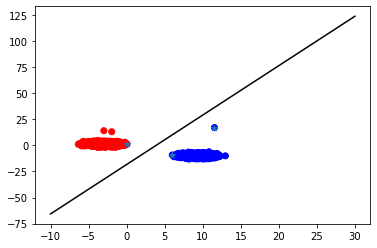

[0.9543262974641871, array([-0.2459079 ,  0.05197027])]

In [65]:
X_d, y_d = LoadData('./X_d.csv', './y_d.csv')
Linear(X_d,y_d)

---
## Zadatak 3 (10):
Učitajte podatke *X\_e, y\_e*. 
- Podijelite skup primjera na skup za učenje i skup za testiranje u omjeru 80%:20%. 
- Trenirajte SVM model na podacima za učenje, zatim ispišite dobivene koeficijente i izračunajte širinu dobivene margine.
- Ispitajte točnost modela na skupu za testiranje koristeći prethodno implementiranu hinge funkciju. Postupak ponovite više puta (npr. 10) te uprosječite rezultate.
- Kao i u prethodnim zadacima grafički prikažite podatke i dobivenu hiperravninu. 
- Možete primijetiti kako ovi podaci nisu linearno separabilni, kako to utječe na SVM?

theta =  [[-1.63624262 -2.0682856 ]] [1.91117697]
Potporni vektori su:
  [[ 1.85382126 -0.98476014]
 [ 0.75412525  0.7866057 ]
 [ 1.17623761  0.14632524]
 [ 1.74152367 -0.11032124]
 [ 0.1266241   1.20022259]
 [ 1.09208883  0.01211143]
 [ 0.9847492   0.23574349]
 [ 1.10234943 -0.25515203]
 [ 0.45484572  0.60476012]
 [ 1.62620013 -0.15454501]
 [ 0.85781465 -0.17579586]
 [ 0.65845349  0.44713353]
 [ 1.17980706  0.27860002]
 [ 1.2436546   0.0658445 ]
 [ 0.92646123 -0.21599508]
 [ 0.98335711 -0.16398609]
 [ 1.71635764 -0.57977773]
 [-0.34630537  0.74744255]
 [ 0.37084618  1.1000185 ]
 [ 0.52516936  0.7792859 ]
 [ 0.47442251  0.77134029]
 [ 1.72652073 -0.17880704]
 [ 1.76463814 -1.90313515]
 [-0.06033611  1.17086652]
 [ 0.43526818  0.91894296]
 [ 1.28826941 -0.44273611]
 [-0.76151558  1.8175854 ]
 [ 0.14065385 -0.01794668]
 [ 0.97428894  0.58968646]
 [ 0.75445722  0.7569704 ]
 [ 0.53260014  0.53492684]
 [ 1.19467766  0.22225855]
 [ 1.41759374  0.13620362]
 [ 1.98992319 -0.20053179]
 [ 0.8625

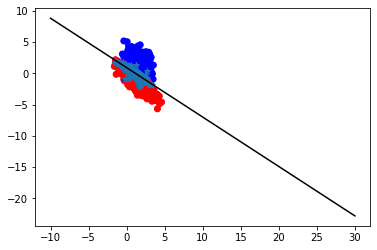

ValueError: Multioutput target data is not supported with label binarization

In [73]:
X_e, y_e = LoadData('./X_e.csv', './y_e.csv')
index = np.random.choice(X_e.shape[0], round(X_e.shape[0]*0.8), replace=False)
trainingData = X_e[index]
trainingDataResults = y_e[index]

index2 = range(X_e.shape[0])
index2 = list(set(index2)^set(index))
testData = X_e[index2]
testDataResults = y_e[index2]

result = Linear(trainingData, trainingDataResults)

clf = SVC(kernel = 'linear')
clf.fit(testData, testDataResults.ravel())
pred_decision = clf.decision_function(X_a)

Hinge(testData, testDataResults)

---
## Zadatak 4 (5):
Neka je zadana funkcija $g(z) = \frac{1}{1+e^{-z}}$. Pokažite kako je
$1-g(z) = g(-z)$.

$g(z) = \frac{1}{1+e^{-z}}$

1 - $g(z) = 1- \frac{1}{1+e^{-z}}$ =$1 - \frac{1}{1+e^{-z}}$ = $ \frac{e^{-z}}{1+e^{-z}} = \frac{\frac{1}{e^{z}}}{\frac{e^{z} + 1}{e^{z}}} = \frac{1}{1+e^{z}} $ 

$g(-z) = \frac{1}{1+e^{z}} $

$1 - g(z) = g(-z)$





---
## Zadatak 5 (10):
Izračunajte gradijent *maximum likelihood* kriterijske funkcije koju ste
vidjeli na predavanju.

$ J(\theta) = \sum_{i=1}^{m} log(1+e^{-y\theta x}) $

$ \frac{\delta J}{\delta \theta_j} = \frac{\delta}{\delta \theta_j} \sum_{i=1}^{m} log(1+e^{-y\theta x})  $ = 
$ \frac{\delta}{\delta \theta_j}  \sum_{i=1}^{m} log(\frac{e^{y\theta x} + 1}{e^{y\theta x}}) = \sum_{i=1}^{m} (\frac{e^{y\theta x}}{e^{y\theta x}+ 1}* \frac{e^{2y\theta x}yx - e^{2y\theta x}yx - e^{y\theta x}yx}{(e^{y\theta x})^2}) = \sum_{i=1}^{m} (\frac{e^{y\theta x}}{e^{y\theta x}+ 1}* \frac{-yx}{e^{y\theta x}}) = -\sum_{i=1}^{m} \frac{yx}{e^{y\theta x}+ 1} $

$ \frac{\delta J}{\delta \theta_j} = \frac{\delta}{\delta \theta_j} \sum_{i=1}^{m} log(1+e^{-y\theta x})  $ = 
$ \frac{\delta}{\delta \theta_j}  \sum_{i=1}^{m} log(\frac{e^{y\theta x} + 1}{e^{y\theta x}}) $
$x_j^{(i)}$

---
## Zadatak 6 (10+10):

Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m\times (k-1)}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k-1$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela. Jedan od takvh modela je logistička regresija. <br>
Logistička regresija kao model funkciju koristi $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$, gdje su $\theta$ parametri koje model uči. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m [-y^{(i)}\log{(h_{\theta}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}]$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom. <br>

1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije ($k=2$). Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte implementiranu funkciju na podacima $X_a, y_a$. Odaberite proizvoljno stopu učenja $\alpha$ i broj iteracija. 
3. Isprobajte implementiranu funkciju na podacima $X_c,y_c$ Kako se logistička regresija ponaša prema podacima koji imaju stršeće vrijednosti?
   Hiperparametre $\alpha$ i broj iteracija odredite koristeći metodu *pretraživanja rešetke*. Napravite rešetku koja će biti definirama vrijednostima $\alpha$, npr. između $0.0001, 0.1$ i brojem iteracija između $100,200$. Za svaki par hiperparametara izračunajte točnost modela (accuracy) i odaberite onaj model s najvećom točnošću. 
4. Isprobajte implementiranu funkciju na podacima $X_d,y_d$. Dodatno nacrtajte graf promjene funkcije cilja kroz iteracije. Opišite dobiveni graf. 


Accuracy koristite kao što je navedeno: `https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html`

In [193]:
def ModelFunction(X, theta):
    eksponent = -1.0 * np.dot(theta,X)
    return (1/(1+ np.exp(eksponent)))

In [219]:
def Gradient(X, y, theta):
    eksponent = (y*theta*X).sum(axis = 1)
    toReturn = y*X / (np.exp(eksponent).reshape(-1,1))
    return -1*toReturn

In [234]:
def LogisticRegression(X,y, iterations, step, draw):
    numRows = X.shape[0]
    numColumns = X.shape[1]
    
    theta = np.zeros(numColumns)
    
    for i in range(iterations):
        theta = theta - step * Gradient(X,y,theta)
        
        if(draw):
            plt.scatter(X[:,0], X[:,1], c = y)
            plt.plot(X,-theta[0]/theta[1]*X, color='plum')
            plt.show()
        
    return theta

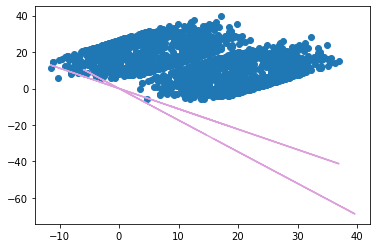

In [240]:
theta = LogisticRegression(X_a,y_a,1000,0.001,False)
plt.scatter(X_a[:,0], X_a[:,1])
plt.plot(X_a,-theta[0]/theta[1]*X_a, color='plum')
plt.show()

In [236]:
clf = SVC(kernel = 'linear')
clf.fit(X_a, y_a.ravel())
pred_decision = clf.decision_function(X_a)

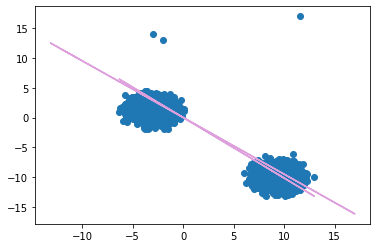

In [242]:
X_d, y_d = LoadData('./X_d.csv','./y_d.csv')
theta = LogisticRegression(X_d,y_d,1000,0.001,False)
plt.scatter(X_d[:,0], X_d[:,1])
plt.plot(X_d,-theta[0]/theta[1]*X_d, color='plum')
plt.show()